# Project Name - <font color='blue'>Product Feedback Analysis</font>

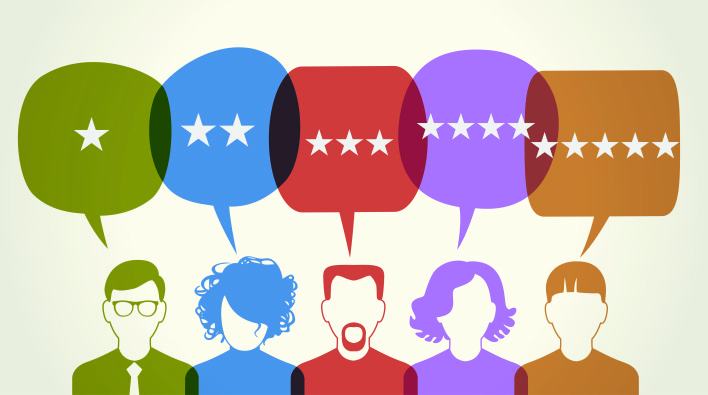

In [233]:
from IPython.display import Image
Image("C:/Users/viki4/Desktop/Reviews.jpg", width=800)

# <font color ='Red'>Business Aspects</font>

<li> Reduce the Manufactuing units and cost of the product
<li> Improve the quality of  product by taking the feedback from the customers 

# <font color ='Red'>Assumptions</font>

<li> The assumptions for the following analysis is that all the reviews provided by the customers are authentic and unbiased

# <font color = 'Red'> Limitations </font>
- The API provides limited access to the data due to which the models don't have much data to be trained upon
- If all the reviews given by the customers turn out to be facts, sentiment analysis could not be carried out on the data 

## Facebook

In [5]:
import pandas as pd
import numpy as np
import facebook

In [71]:
graph = facebook.GraphAPI(access_token="EAACcYJ4a3rQBAJhxgkoqEy6aNGmj5QdTMLsOxqXpHR2eomKHE0DeYvAf7syzc7HK7KYfYzAOSRZAqxhVuPvXguZALFa8TpWVoyFlyybn0d6asCK34cRZA6aFeC6LyVfTmYkjtbEK6H81bzDWUsBoelImOZBJXzRlhBMauZBOZAg2inW6QIqfTjY21EVQZChJZB8ZD", version="2.6")

In [105]:
#### Get comments from post
post = graph.get_object(id='10155966298429003', fields='comments')
print(post)

{'comments': {'data': [{'created_time': '2018-03-13T08:16:33+0000', 'message': 'Except climate control. Apparently it’s too high tech for 2018. The 77TSI came with climate control NINE years ago! Talk about a massive leap backwards.', 'id': '10155966298429003_10156016114629003'}, {'created_time': '2018-03-14T12:45:46+0000', 'message': 'Never never ever would I buy another Volkswagen. My polo is a lemon. Onto my second timing chain at only 60,000 kms and just been told I need another gearbox replacement. No thanks.', 'id': '10155966298429003_10156019524929003'}, {'created_time': '2018-03-15T00:37:21+0000', 'message': 'So much tech except for the rear brakes, which are drum brakes, in 2018... 😑', 'id': '10155966298429003_10156021086124003'}, {'created_time': '2018-03-13T07:37:06+0000', 'message': 'Will the GTI be available in Manual?', 'id': '10155966298429003_10156016058109003'}, {'created_time': '2018-03-14T05:51:00+0000', 'message': "So now they're copying Kia.", 'id': '10155966298429

In [107]:
data = post['comments']['data']
len(data)

25

In [119]:
messages=[]
for i in data:
    messages.append(i['message'])
    #messages[].append(i['id'])
messages

['Except climate control. Apparently it’s too high tech for 2018. The 77TSI came with climate control NINE years ago! Talk about a massive leap backwards.',
 'Never never ever would I buy another Volkswagen. My polo is a lemon. Onto my second timing chain at only 60,000 kms and just been told I need another gearbox replacement. No thanks.',
 'So much tech except for the rear brakes, which are drum brakes, in 2018... 😑',
 'Will the GTI be available in Manual?',
 "So now they're copying Kia.",
 'Will it have digital radio?? We are in 2018 now...',
 'I reckon the exterior styling is looking better than the Golf these days 🙂',
 'So is the Polo GTI coming in manual?',
 'It’s a gorgeous looking car both inside and out but is lacking in a few features; including dual zone climate control (as available in other markets) and a larger range in colours (sorry VW, I don’t want orange but a blue would be nice). I am also wondering if when the launch goes, what will be the top non GTI model with fea

In [240]:
Facebook_Messages=pd.DataFrame()
Facebook_Messages['Messages']=messages
Facebook_Messages

,Messages
0,Except climate control. Apparently it’s too hi...
1,Never never ever would I buy another Volkswage...
2,"So much tech except for the rear brakes, which..."
3,Will the GTI be available in Manual?
4,So now they're copying Kia.
5,Will it have digital radio?? We are in 2018 no...
6,I reckon the exterior styling is looking bette...
7,So is the Polo GTI coming in manual?
8,It’s a gorgeous looking car both inside and ou...
9,Im really interested in the 190kw Amorok thats...


In [218]:
import json
from pandas.io.json import json_normalize

In [219]:
df1=pd.DataFrame(messages)
df1

,0
0,Except climate control. Apparently it’s too hi...
1,Never never ever would I buy another Volkswage...
2,"So much tech except for the rear brakes, which..."
3,Will the GTI be available in Manual?
4,So now they're copying Kia.
5,Will it have digital radio?? We are in 2018 no...
6,I reckon the exterior styling is looking bette...
7,So is the Polo GTI coming in manual?
8,It’s a gorgeous looking car both inside and ou...
9,Im really interested in the 190kw Amorok thats...


In [220]:
import textblob as tb
from textblob import TextBlob

In [221]:
comments=df1[0]
comments

0     Except climate control. Apparently it’s too hi...
1     Never never ever would I buy another Volkswage...
2     So much tech except for the rear brakes, which...
3                  Will the GTI be available in Manual?
4                           So now they're copying Kia.
5     Will it have digital radio?? We are in 2018 no...
6     I reckon the exterior styling is looking bette...
7                  So is the Polo GTI coming in manual?
8     It’s a gorgeous looking car both inside and ou...
9     Im really interested in the 190kw Amorok thats...
10    Need a manual in the Polo GTI, can’t believe t...
11    Does it come with digital radio? And where is ...
12    Nice cars pitty but the real good cars are ove...
13    I’d be happy with an up! GTI thanks Volkswagen AU
14    Harrison I don’t see the point of buying a sma...
15                         Need a manual in the GTI!!!!
16                     Interior typically V W the best!
17    That looks like an archaic 2000s interior 

In [224]:
cm1=comments[8]
blob=TextBlob(cm1)
blob.sentiment

Sentiment(polarity=0.16964285714285715, subjectivity=0.45535714285714285)

In [159]:
import matplotlib.pyplot as plot
%matplotlib inline
polarity=[]
subj=[]
for t in commennts:
    tx=TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

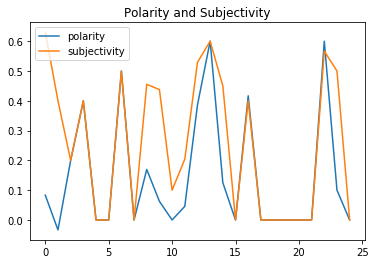

In [160]:
poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})   
poltweet.plot(title='Polarity and Subjectivity')

In [161]:
list=[]
list= comments
wordstring = list
wordstring

0     Except climate control. Apparently it’s too hi...
1     Never never ever would I buy another Volkswage...
2     So much tech except for the rear brakes, which...
3                  Will the GTI be available in Manual?
4                           So now they're copying Kia.
5     Will it have digital radio?? We are in 2018 no...
6     I reckon the exterior styling is looking bette...
7                  So is the Polo GTI coming in manual?
8     It’s a gorgeous looking car both inside and ou...
9     Im really interested in the 190kw Amorok thats...
10    Need a manual in the Polo GTI, can’t believe t...
11    Does it come with digital radio? And where is ...
12    Nice cars pitty but the real good cars are ove...
13    I’d be happy with an up! GTI thanks Volkswagen AU
14    Harrison I don’t see the point of buying a sma...
15                         Need a manual in the GTI!!!!
16                     Interior typically V W the best!
17    That looks like an archaic 2000s interior 

# Twitter

In [168]:
import numpy as np
import pandas as pd


In [169]:
import twitter
from twitter import Twitter
from twitter import OAuth
from twitter import TwitterHTTPError
from twitter import TwitterStream

In [170]:
ck= 'hq1ikoFrNoXH32vVwH4tdYewd'
cs= 'UpsUIWyTXNtOoKGCuQZw7dQ9LO2lzx5vxnw069g4gg9BGfWl3Z'
at='753638455-fQJkPQDV4aDafISatU7ZjRBjf4UMb2ufYyKSI2bU'   
ats='Cjym1sTksiwAKp7Zeh78ngdqZYUI29r981Dw4eFqMCJ4e'

In [172]:
oauth= OAuth(at,ats,ck,cs)
twit_api=Twitter(auth=oauth)
t_loc= twit_api.trends.available()
t_loc
ts= TwitterStream(auth=oauth)

In [173]:
iterator = ts.statuses.filter(track="Volkswagen",language="en")

In [174]:
b=[]
for t in iterator:
    print(t)
    b.append(t)
    if len(b)==25:
        break

{'created_at': 'Thu Apr 26 03:46:55 +0000 2018', 'id': 989350082200981504, 'id_str': '989350082200981504', 'text': "RT @FredNBCLA: Are the #Dodgers jammed into a Volkswagen because it looks like they're coming out of a clown car..", 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 561083842, 'id_str': '561083842', 'name': 'Miguel 🤷🏾\u200d♂️', 'screen_name': 'Miquel803', 'location': 'Columbia, SC', 'url': 'https://www.instagram.com/miquel803/', 'description': 'Jeeps, politics, and Real Madrid |Political Science Major #CocksBy90', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1176, 'friends_count': 332, 'listed_count': 10, 'favourites_count': 47076, 'statuses_count': 40476, 'created_at': 'Mon Apr 23 12:19:28 +0

{'created_at': 'Thu Apr 26 03:48:00 +0000 2018', 'id': 989350355497435136, 'id_str': '989350355497435136', 'text': 'eBay: 1967 Volkswagen Beetle - Classic Standard Original 1967 VW Bug.....ONE OWNER! https://t.co/ZFt0sdlc35 https://t.co/YMla2kTOvZ', 'display_text_range': [0, 107], 'source': '<a href="https://dlvrit.com/" rel="nofollow">dlvr.it</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2387560705, 'id_str': '2387560705', 'name': 'US Classic Autos', 'screen_name': 'USClassicAutos', 'location': 'United States', 'url': 'http://ClassicAutos.tel', 'description': 'View the latest Classic Cars & Trucks For Sale on eBay USA.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 4862, 'friends_count': 887, 'listed_count': 88, 'favourites_count': 7, 'statuses_count': 199961, 'created_at': 'Thu Mar 13 17:47:

{'created_at': 'Thu Apr 26 03:49:15 +0000 2018', 'id': 989350668958945281, 'id_str': '989350668958945281', 'text': '“It’s not going to judge you like a fucking Volkswagen would” 🤣 https://t.co/HMhlSXUR52', 'display_text_range': [0, 63], 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 2446192608, 'id_str': '2446192608', 'name': 'Ahmad', 'screen_name': 'Mushtaq_33', 'location': 'South Detroit aka Windsor', 'url': 'https://twitter.com/jourdanjd/status/947924268393861122', 'description': 'All praise and glory be to God • Petrolhead 🤙🏼 #GoBlue', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 317, 'friends_count': 255, 'listed_count': 1, 'favourites_count': 40664, 'statuses_count': 16023, 'created_at': 'Tue Apr 15 

{'created_at': 'Thu Apr 26 03:49:23 +0000 2018', 'id': 989350704702685184, 'id_str': '989350704702685184', 'text': 'RT @vwpress_en: #VWGroup CEO Diess speaks at the #VWpressconference about Volkswagen’s future plans for the Chinese market. #AutoChina #Bei…', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 718256347331051520, 'id_str': '718256347331051520', 'name': 'Luis Palacios', 'screen_name': 'LuisPa36622711', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 87, 'friends_count': 476, 'listed_count': 0, 'favourites_count': 3659, 'statuses_count': 3369, 'created_at': 'Fri Apr 08 01:57:12 +0000 2016', 'utc_offset': None, 'time_zone': None, 'geo_enabled': Fal

{'created_at': 'Thu Apr 26 03:52:31 +0000 2018', 'id': 989351492057489408, 'id_str': '989351492057489408', 'text': 'Maryland reaches $33.5 million ... https://t.co/1vqBpkvClT   #BankruptcyPersonal #BusinessFinance #BusinessLaw #BusinessLawGeneral', 'source': '<a href="http://westlakelegal.com/" rel="nofollow">Westlake Legal group WLL</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 952670005400952833, 'id_str': '952670005400952833', 'name': 'Westlake Legal Group', 'screen_name': 'WestLakeLegalGr', 'location': 'Sterling, VA', 'url': 'https://westlakelegal.com/', 'description': 'Loudoun County Virginia, Criminal, DUI, Divorce, Family law, Real Estate, and Personal Injury Lawyers.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 34, 'friends_count': 67, 'listed_count': 0, 'favourites_count': 0, 'statu

{'created_at': 'Thu Apr 26 03:54:19 +0000 2018', 'id': 989351943481982976, 'id_str': '989351943481982976', 'text': 'Front hood VW emblem 113853601B\xa0\xa0\xa0Price: 25 - https://t.co/Dc3gIU34ft #VW #volkswagen #flat4 #Coccinelle #Cox… https://t.co/qgQxOQfB0R', 'display_text_range': [0, 140], 'source': '<a href="http://www.flat4central.com" rel="nofollow">flat4central-wp</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 778531384512086016, 'id_str': '778531384512086016', 'name': 'Flat4Central', 'screen_name': 'Flat4Central', 'location': None, 'url': 'http://www.flat4central.com', 'description': "@Flat4Central | http://flat4central.com\nCompte d'un addict aux #cox #combi #buggy #ghia #aircooled #flat4 #entretien #mecanique #PetitesAnnonces ;)", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 103, 'frie

{'created_at': 'Thu Apr 26 03:54:46 +0000 2018', 'id': 989352058594693120, 'id_str': '989352058594693120', 'text': 'The price has changed on our 2005 Volkswagen Jetta. Take a look: https://t.co/4uuO6xLuKn', 'source': '<a href="http://cc.carsforsale.com" rel="nofollow">CfsVehicleManagement</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 736231456004001793, 'id_str': '736231456004001793', 'name': 'Your Choice Autos', 'screen_name': 'YourChoiceAS', 'location': None, 'url': None, 'description': None, 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 20, 'friends_count': 11, 'listed_count': 0, 'favourites_count': 0, 'statuses_count': 40594, 'created_at': 'Fri May 27 16:23:52 +0000 2016', 'utc_offset': None, 'time_zone': None, 'geo_enabled': False, 'lang': 'en', 'contributors_enabled': False, 'is_translato

{'created_at': 'Thu Apr 26 03:56:18 +0000 2018', 'id': 989352444776910848, 'id_str': '989352444776910848', 'text': 'NOS license light bulb holder\xa0\xa0\xa0Price: 39eur - https://t.co/mZBVNmzHPe #VW #volkswagen #flat4 #Coccinelle #Cox… https://t.co/u5qwUGFmHL', 'display_text_range': [0, 140], 'source': '<a href="http://www.flat4central.com" rel="nofollow">flat4central-wp</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 778531384512086016, 'id_str': '778531384512086016', 'name': 'Flat4Central', 'screen_name': 'Flat4Central', 'location': None, 'url': 'http://www.flat4central.com', 'description': "@Flat4Central | http://flat4central.com\nCompte d'un addict aux #cox #combi #buggy #ghia #aircooled #flat4 #entretien #mecanique #PetitesAnnonces ;)", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 103, 'fri

{'created_at': 'Thu Apr 26 03:58:19 +0000 2018', 'id': 989352950576402432, 'id_str': '989352950576402432', 'text': 'Original Headlight Rims Rechromed Beetle Oval\xa0\xa0\xa0Price: £110 - https://t.co/jHazRlNs1o #VW #volkswagen #flat4… https://t.co/InD90XzJDV', 'display_text_range': [0, 140], 'source': '<a href="http://www.flat4central.com" rel="nofollow">flat4central-wp</a>', 'truncated': True, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 778531384512086016, 'id_str': '778531384512086016', 'name': 'Flat4Central', 'screen_name': 'Flat4Central', 'location': None, 'url': 'http://www.flat4central.com', 'description': "@Flat4Central | http://flat4central.com\nCompte d'un addict aux #cox #combi #buggy #ghia #aircooled #flat4 #entretien #mecanique #PetitesAnnonces ;)", 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 103, 'frien

{'created_at': 'Thu Apr 26 04:00:53 +0000 2018', 'id': 989353598705455110, 'id_str': '989353598705455110', 'text': 'Volkswagen goes big on Roadmap E https://t.co/L8LBrcd715 https://t.co/ad2DWJ1bBC', 'display_text_range': [0, 56], 'source': '<a href="https://smarterqueue.com" rel="nofollow">SmarterQueue</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 3740102363, 'id_str': '3740102363', 'name': 'ElecTrans', 'screen_name': 'ElecTransNews', 'location': 'United Kingdom', 'url': 'http://www.electrans.co.uk', 'description': 'Electric Vehicle & Transportation News from around the world.\nPowered by @newsbase \nEditor @DrewDykes\n #EV #Electricvehicles', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 1197, 'friends_count': 4045, 'listed_count': 23, 'favourites_count': 134, 'statuses_count': 923, 'created_a

{'created_at': 'Thu Apr 26 04:03:07 +0000 2018', 'id': 989354159328636928, 'id_str': '989354159328636928', 'text': 'Volkswagen exec hints at Navistar takeover https://t.co/ULZ7l6rx9e https://t.co/htGeYyIKi7', 'display_text_range': [0, 66], 'source': '<a href="http://bufferapp.com" rel="nofollow">Buffer</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 599444535, 'id_str': '599444535', 'name': 'Equipment World', 'screen_name': 'Equipment_World', 'location': 'Tuscaloosa, Alabama', 'url': 'http://equipmentworld.com', 'description': 'Equipment World serves up the latest news in construction, heavy equipment, pickups and everything else that helps you get the hard work done.', 'translator_type': 'none', 'protected': False, 'verified': False, 'followers_count': 8683, 'friends_count': 224, 'listed_count': 162, 'favourites_count': 240, 'statuse

In [175]:
len(b)

25

In [176]:
import json
from pandas.io.json import json_normalize

In [177]:
df=json_normalize(b)
df.head()

,contributors,coordinates,coordinates.coordinates,coordinates.type,created_at,display_text_range,entities.hashtags,entities.media,entities.symbols,entities.urls,...,user.profile_text_color,user.profile_use_background_image,user.protected,user.screen_name,user.statuses_count,user.time_zone,user.translator_type,user.url,user.utc_offset,user.verified
0,None,NaN,NaN,NaN,Thu Apr 26 03:46:55 +0000 2018,NaN,"[{'text': 'Dodgers', 'indices': [23, 31]}]",NaN,[],[],...,333333,True,False,Miquel803,40476,Eastern Time (US & Canada),none,https://www.instagram.com/miquel803/,-14400.0,False
1,None,NaN,NaN,NaN,Thu Apr 26 03:47:31 +0000 2018,NaN,"[{'text': 'CEBIT18', 'indices': [119, 127]}]",NaN,[],[],...,333333,True,False,DanielaRutsch,302,Bern,none,http://www.volkswagenag.com,7200.0,False
2,None,NaN,NaN,NaN,Thu Apr 26 03:48:00 +0000 2018,"[0, 107]",[],"[{'id': 989350351185707008, 'id_str': '9893503...",[],"[{'url': 'https://t.co/ZFt0sdlc35', 'expanded_...",...,333333,True,False,USClassicAutos,199961,London,none,http://ClassicAutos.tel,3600.0,False
3,None,NaN,NaN,NaN,Thu Apr 26 03:48:17 +0000 2018,"[0, 140]","[{'text': 'VW', 'indices': [78, 81]}, {'text':...",NaN,[],"[{'url': 'https://t.co/6SFP54djRY', 'expanded_...",...,000000,False,False,Flat4Central,93219,None,none,http://www.flat4central.com,NaN,False
4,None,NaN,NaN,NaN,Thu Apr 26 03:49:15 +0000 2018,"[0, 63]",[],NaN,[],"[{'url': 'https://t.co/HMhlSXUR52', 'expanded_...",...,333333,True,False,Mushtaq_33,16023,Eastern Time (US & Canada),none,https://twitter.com/jourdanjd/status/947924268...,-14400.0,False


In [178]:
# Textblob
import textblob as tb
from textblob import TextBlob

In [179]:
!python -m textblob.download_corpora

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!

In [180]:
tweettext=df['text']

In [189]:
tx=tweettext[16]
blob=TextBlob(tx)
tx

'Forget #Netflix – get 6-months Amazon Prime Video totally #FREE https://t.co/gdtm7a3CEw #Ware #motivation… https://t.co/pUycrBeNC1'

In [190]:
blob.sentiment

Sentiment(polarity=0.4, subjectivity=0.8)

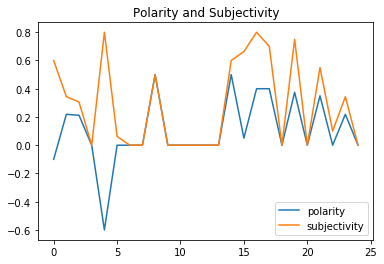

In [183]:
# Plot Sentiments
import matplotlib.pyplot as plot
%matplotlib inline
polarity=[]
subj=[]
for t in tweettext:
    tx=TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)

    
poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})   
poltweet.plot(title='Polarity and Subjectivity')

In [191]:
list=[]
list= df['text']
wordstring = list[0]
wordstring

"RT @FredNBCLA: Are the #Dodgers jammed into a Volkswagen because it looks like they're coming out of a clown car.."

In [192]:
n=1
while n < 25:
    wordstring += list[n]
    n=n+1

In [193]:
wordstring
wordlist = wordstring.split()

In [194]:
tweettext=df['text']

In [195]:
blob=TextBlob(wordstring)
blob

TextBlob("RT @FredNBCLA: Are the #Dodgers jammed into a Volkswagen because it looks like they're coming out of a clown car..RT @cebit: Volkswagen at CEBIT! As present as never before – we are excited about many innovations of future mobility! #CEBIT18 #futuremobi…eBay: 1967 Volkswagen Beetle - Classic Standard Original 1967 VW Bug.....ONE OWNER! https://t.co/ZFt0sdlc35 https://t.co/YMla2kTOvZVW 1300 VW1300 script badge emblem logo   Price: 45 - https://t.co/6SFP54djRY #VW #volkswagen #flat4 #Coccinelle… https://t.co/d8hinJE8vi“It’s not going to judge you like a fucking Volkswagen would” 🤣 https://t.co/HMhlSXUR52RT @vwpress_en: #VWGroup CEO Diess speaks at the #VWpressconference about Volkswagen’s future plans for the Chinese market. #AutoChina #Bei…SEDAN Bandai Toys Co, battery operated,VOLKSWAGEN KING SIZE REF. 4084 https://t.co/4I4MbvuH5Z https://t.co/29wYIqWoPwMaryland reaches $33.5 million ... https://t.co/1vqBpkvClT   #BankruptcyPersonal #BusinessFinance #BusinessLaw #BusinessLawG

In [203]:
df_twit = pd.DataFrame()
df_twit['data']=tweettext
df_twit

,data
0,RT @FredNBCLA: Are the #Dodgers jammed into a ...
1,RT @cebit: Volkswagen at CEBIT! As present as ...
2,eBay: 1967 Volkswagen Beetle - Classic Standar...
3,VW 1300 VW1300 script badge emblem logo Pric...
4,“It’s not going to judge you like a fucking Vo...
5,RT @vwpress_en: #VWGroup CEO Diess speaks at t...
6,"SEDAN Bandai Toys Co, battery operated,VOLKSWA..."
7,Maryland reaches $33.5 million ... https://t.c...
8,@CNNMoney FORD can go ahead with that ... Volk...
9,Maryland reaches $33.5 million ... https://t.c...


In [211]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\viki4\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [213]:
corpus = []
for i in range(0,24):
    review = re.sub('[^a-zA-Z]', ' ', df_twit['data'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()  # Taking roots of different versions of the same word; 
                          # Not to have too many words in the end; 
                          # To regroup same versions of the words;
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)
corpus

['rt frednbcla dodger jam volkswagen look like come clown car',
 'rt cebit volkswagen cebit present never excit mani innov futur mobil cebit futuremobi',
 'ebay volkswagen beetl classic standard origin vw bug one owner http co zft sdlc http co ymla ktovz',
 'vw vw script badg emblem logo price http co sfp djri vw volkswagen flat coccinel http co hinj vi',
 'go judg like fuck volkswagen would http co hmhlsxur',
 'rt vwpress en vwgroup ceo diess speak vwpressconfer volkswagen futur plan chines market autochina bei',
 'sedan bandai toy co batteri oper volkswagen king size ref http co mbvuh z http co wyiqwopw',
 'maryland reach million http co vqbpkvclt bankruptcyperson businessfin businesslaw businesslawgener',
 'cnnmoney ford go ahead volkswagen need busi build better car',
 'maryland reach million http co vqbpkvclt http co j tfq bankruptcyperson http co j ok zio',
 'front hood vw emblem b price http co dc giu ft vw volkswagen flat coccinel cox http co qgqxoqfb r',
 'price chang volkswag

In [196]:
blob.sentiment

Sentiment(polarity=0.17841666666666664, subjectivity=0.4412222222222222)

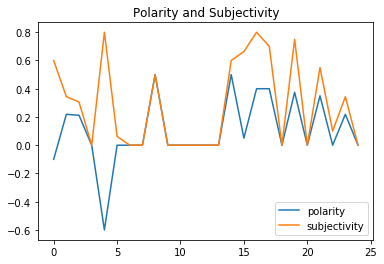

In [197]:
# Plots
import matplotlib.pyplot as plot
%matplotlib inline
polarity=[]
subj=[]
for t in tweettext:
    tx=TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)
    
poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})   
poltweet.plot(title='Polarity and Subjectivity')


In [245]:
combined_data=pd.DataFrame()
combined_data=pd.concat([df_twit['data'],Facebook_Messages['Messages']],ignore_index=True)
combined_data

0     RT @FredNBCLA: Are the #Dodgers jammed into a ...
1     RT @cebit: Volkswagen at CEBIT! As present as ...
2     eBay: 1967 Volkswagen Beetle - Classic Standar...
3     VW 1300 VW1300 script badge emblem logo   Pric...
4     “It’s not going to judge you like a fucking Vo...
5     RT @vwpress_en: #VWGroup CEO Diess speaks at t...
6     SEDAN Bandai Toys Co, battery operated,VOLKSWA...
7     Maryland reaches $33.5 million ... https://t.c...
8     @CNNMoney FORD can go ahead with that ... Volk...
9     Maryland reaches $33.5 million ... https://t.c...
10    Front hood VW emblem 113853601B   Price: 25 - ...
11    The price has changed on our 2009 Volkswagen G...
12    The price for 2009 Volkswagen GTI is $7,999 no...
13    The price has changed on our 2005 Volkswagen J...
14    I love you all 🖤🖤🖤🖤🖤🖤 #volkswagen #vw #love #f...
15    @skotterbutt I’m not sure any of that is a ben...
16    Forget #Netflix – get 6-months Amazon Prime Vi...
17    NOS license light bulb holder   Price: 39e

In [278]:
combined_data['Messages']=combined_data[0]


In [253]:
combined_data

0           RT @FredNBCLA: Are the #Dodgers jammed into a ...
1           RT @cebit: Volkswagen at CEBIT! As present as ...
2           eBay: 1967 Volkswagen Beetle - Classic Standar...
3           VW 1300 VW1300 script badge emblem logo   Pric...
4           “It’s not going to judge you like a fucking Vo...
5           RT @vwpress_en: #VWGroup CEO Diess speaks at t...
6           SEDAN Bandai Toys Co, battery operated,VOLKSWA...
7           Maryland reaches $33.5 million ... https://t.c...
8           @CNNMoney FORD can go ahead with that ... Volk...
9           Maryland reaches $33.5 million ... https://t.c...
10          Front hood VW emblem 113853601B   Price: 25 - ...
11          The price has changed on our 2009 Volkswagen G...
12          The price for 2009 Volkswagen GTI is $7,999 no...
13          The price has changed on our 2005 Volkswagen J...
14          I love you all 🖤🖤🖤🖤🖤🖤 #volkswagen #vw #love #f...
15          @skotterbutt I’m not sure any of that is a ben...
16      

In [261]:
tweettext=combined_data

In [275]:
tx=tweettext[1]
blob=TextBlob(tx)
tx


'RT @cebit: Volkswagen at CEBIT! As present as never before – we are excited about many innovations of future mobility! #CEBIT18 #futuremobi…'

In [276]:
blob.sentiment

Sentiment(polarity=0.21875, subjectivity=0.34375)

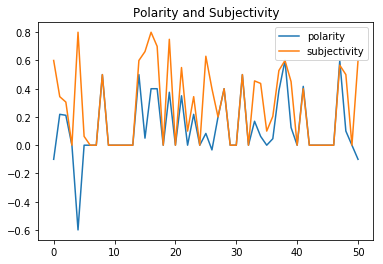

In [268]:
# Plots
import matplotlib.pyplot as plot
%matplotlib inline
polarity=[]
subj=[]
for t in tweettext:
    tx=TextBlob(t)
    polarity.append(tx.sentiment.polarity)
    subj.append(tx.sentiment.subjectivity)
    
poltweet= pd.DataFrame({'polarity':polarity,'subjectivity':subj})   
poltweet.plot(title='Polarity and Subjectivity')

# <font color='red'>Conclusion and Future Scope</font>


#### We are planning on sending the feedback from the above analysis to the owners of the companies, using which they can improve their service, inturn maximizing their profits.